## Polinomios de Lagrange para 3 puntos
Los polinomios de Lagrange viene definido por la formula
\begin{equation}
L_{j}(x) = ∏_{i = 0, i \neq j}^{n-1}\frac{x-x_{i}}{x_{j}-x_{i}}
\end{equation}
Luego el polinomio sería:
\begin{equation}
P(x) = \sum_{k = 0}^{n} f(x_{k})L_{k}(x)
\end{equation}
En nuestro caso tenemos los puntos $H = \left\{ (x,y)\in ℝ \times ℝ: (2,4),(5,1),(6,2)   \right\}$
Siendo cada polinomio:
\begin{equation}
 L_{0}(x) = (\frac{x - x_{1}}{x_{0} - x_{1}})(\frac{x-x_{2}}{x_{0} - x_{2}})
\end{equation}
\begin{equation}
 L_{1}(x) = (\frac{x - x_{0}}{x_{1} - x_{0}})(\frac{x-x_{2}}{x_{1} - x_{2}})
\end{equation}
\begin{equation}
 L_{2}(x) = (\frac{x - x_{0}}{x_{2} - x_{0}})(\frac{x-x_{1}}{x_{2} - x_{1}})
\end{equation}
Así el polinomio total sería:
\begin{equation}
P(x) = f(x_{0})L_{0} + f(x_{1})L_{1} + f(x_{2})L_{2}
\end{equation}

\begin{equation}
P(x) = f(x_{0})(\frac{x - x_{1}}{x_{0} - x_{1}})(\frac{x-x_{2}}{x_{0} - x_{2}}) + f(x_{1})(\frac{x - x_{0}}{x_{1} - x_{0}})(\frac{x-x_{2}}{x_{1} - x_{2}}) + f(x_{2})(\frac{x - x_{0}}{x_{2} - x_{0}})(\frac{x-x_{1}}{x_{2} - x_{1}})
\end{equation}

Reemplazando valores sería:

\begin{equation}
 P(x) = 4(\frac{x - 5}{2 - 5})(\frac{x-6}{2 - 6} + (6-x)(\frac{x-2}{3})+2(\frac{x-2}{4})(x-5)
\end{equation}

In [ ]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

In [ ]:
x = sp.Symbol("x")
puntosx = (2,5,6)
puntosy = (4,1,2)
L_i = list()
for j in range(len(puntosx)):
  f = 1
  for i in range(len(puntosx)):
    if i != j:
      f = f * ( (x-puntosx[i])/(puntosx[j] - puntosx[i]))
  L_i.append(f)
L_i
p = 0
for i in range(len(L_i)):
  p = p + puntosy[i]*L_i[i]
p

4*(3/2 - x/4)*(5/3 - x/3) + (6 - x)*(x/3 - 2/3) + 2*(x/4 - 1/2)*(x - 5)

In [ ]:
def Lagrange(j,x_):
  """
  Paramas : Polinomio de lagrange j-esimo
  n : Número de puntos.
  x_ : puntos a interpolar
  """
  L0 = 1
  for i in range(0,len(x_)):
     if i != j:
      L0*= ( x - x_[i]) / (x_[j] - x_[i])
  return L0

def P(x,x_,y_):
  poly = 0
  for i in range(0,len(y_)):
    poly += y_[i]*Lagrange(i,x_)
  return poly

In [ ]:
x_ = np.array([2,5,6])
y_ = np.array([4,1,2])

sp.simplify(P(x,x_,y_))

x**2/2 - 9*x/2 + 11

In [ ]:
def polinomio_lagrange(datosx,datosy):
  x = sp.Symbol("x")
  L = list()
  for j in range(len(datosx)):
    f = 1
    for i in range(len(datosx)):
      if i != j:
        f = f * ( (x-datosx[i])/(datosx[j] - datosx[i]))
    L.append(f)
  p = 0
  for i in range(len(L)):
    p = p + datosy[i]*L[i]
  return p

sp.simplify(polinomio_lagrange(puntosx,puntosy))

fx = sp.lambdify(x,sp.simplify(polinomio_lagrange(puntosx,puntosy)),"numpy")


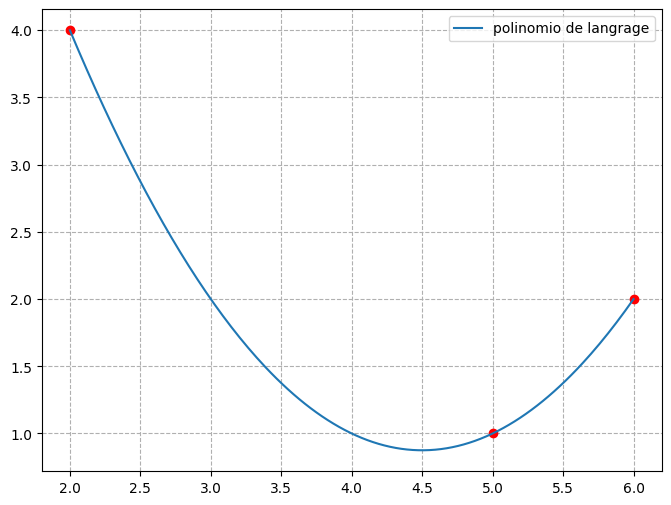

In [ ]:
x1 = np.linspace(min(puntosx),max(puntosx),200)
plt.figure(figsize = (8,6))
plt.plot(puntosx,puntosy,"ro")
plt.plot(x1,fx(x1),label = "polinomio de langrage")
plt.grid(True,linestyle ="dashed")
plt.legend()